In [ ]:
import numpy as np

##Defining Grid world

In [ ]:
class Grid():
    def __init__(self , rows , cols , start):
        self.rows = rows
        self.cols = cols
        self.i = start[0]
        self.j = start[1]

    def set(self, actions , rewards):
        self.actions = actions
        self.rewards = rewards

    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]

    def is_terminal(self, s):
        return s in self.rewards

    def current_state(self):
        return (self.i , self.j)

    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())

    def next_state(self , s , a):
        i , j = s[0] , s[1]

        if a in self.actions[(i , j)]:
            if a == "U":
                i -= 1

            elif a == "D":
                i += 1

            elif a == "R":
                j += 1

            elif a == "L":
                j -= 1
                
        return i , j

## The grid world which we are going to use is shown below

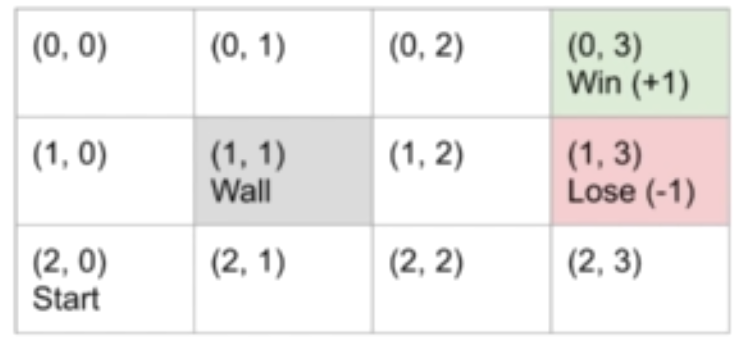

In [ ]:
def initialize_grid():
    rows , cols = 3 , 4
    start = (2 , 0)
    g = Grid(rows , cols , start)
    
    # reward for termination state
    rewards = {(0, 3): 1 , (1 , 3) : -1}
    
    # possible actions can be performed for each state
    actions = {
              (0, 0):["D" , "R"],
              (0, 1):["R"],
              (0, 2):["R"],
              (1, 0):["U" ,"D"],
              (1, 1):["N"],
              (1, 2):["U" ,"D" ,"R"],
              (2, 0):["U" , "R"],
              (2, 1):["R" , "L"],
              (2, 2):["R" , "L" ,"U"],
              (2, 3):["L" , "U"]
    }

    g.set(actions , rewards)

    return g

## Visualization Functions

In [ ]:
def print_values(V, g):
    print("Printing Values")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="") # -ve sign takes up an extra space
        print("")


def print_policy(P, g):
    print("Printing Policy")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i,j), ' ')
            print("  %s  |" % a, end="") 
        print("")

## Defining policy

In [ ]:
Policy = {(2 ,0 ) : "R",
          (2 , 1) : "R",
          (2 , 2) : "U",
          (1 , 2) : "U",
          (0 , 2) : "R",
          (1 , 0) : "U",
          (0 , 0) : "R",
          (0 , 1) : "R",
          (2 , 3) : "L"
          }

## Initializing the Grid

In [ ]:
gamma = 0.9
grid = initialize_grid()
ACTION_SPACE = ("U" , "D" ,"R" , "L")

## assign transition probabilities

In [ ]:
transition_probs = {}  # p(s'|s , a)
rewards = {}
for i in range(grid.rows):
    for j in range(grid.cols):
        s = (i ,j)
        if not grid.is_terminal(s):
            for a in ACTION_SPACE:
                s2 = grid.next_state(s , a)
                transition_probs[(s , a , s2)] = 1
                if s2 in grid.rewards:
                    rewards[(s , a , s2)] = grid.rewards[s2]

## intialize value

In [ ]:
V = {}
for i in range(grid.rows):
    for j in range(grid.cols):
        V[(i , j)] = 0

# Iterative policy evaluations

In [ ]:
it = 0
threshold = 1e-3
gamma = 0.9

while True:
    biggest_change = 0
    for s in grid.all_states():
        if not grid.is_terminal(s):
            old_v = V[s]
            new_v = 0
            for a in ACTION_SPACE:
                for s2 in grid.all_states():

                    # action probability is deterministic
                    action_prob = 1 if Policy.get(s) == a else 0
                    
                    # reward is a function of (s, a, s'), 0 if not specified
                    r = rewards.get((s , a , s2) , 0)
                    
                    # V(s) += Pi(a|s)*p(s' |s , a)*(r + g*V(s'))
                    new_v += action_prob*transition_probs.get((s , a , s2) , 0)*(r + gamma*V[s2])
            
            V[s] = new_v
            biggest_change = max(biggest_change , np.abs(old_v - new_v))
    
    it += 1
    print("Iteration : " , it , " , Biggest change : " , biggest_change)
    print_values(V , grid)
    print("")

    if biggest_change < threshold:
        break

print_policy(Policy , grid)

Iteration :  1  , Biggest change :  1.0
Printing Values
---------------------------
 0.00| 0.00| 1.00| 0.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|

Iteration :  2  , Biggest change :  0.9
Printing Values
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.90| 0.00|
---------------------------
 0.00| 0.00| 0.81| 0.00|

Iteration :  3  , Biggest change :  0.7290000000000001
Printing Values
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.90| 0.00|
---------------------------
 0.66| 0.73| 0.81| 0.73|

Iteration :  4  , Biggest change :  0
Printing Values
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.90| 0.00|
---------------------------
 0.66| 0.73| 0.81| 0.73|

Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
-